In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# Including the command for inline plotting
%matplotlib inline

In [4]:
# define path
PATH = 'Data'

In [5]:
# import cleaned dataset

df= pd.read_csv(os.path.join(PATH, 'Prepared Data', 'Netflix_Data_clean.csv'))

In [6]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas"
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies"
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"


In [7]:
df.shape

(5336, 11)

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

# 2. Removing unnecessary variables

In [9]:
# craete a subset
df_netflix= df[['title', 'director', 'cast', 'country',
        'release_year', 'rating', 'duration', 'listed_in']]

In [10]:
df_netflix.head(5)

,title,director,cast,country,release_year,rating,duration,listed_in
0,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
1,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
2,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas"
3,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies"
4,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"


# 3. Create a correlation matrix heatmap (colored)¶

In [11]:
from sklearn.preprocessing import LabelEncoder # Use the LabelEncoder class 
#from the sklearn.preprocessing module to encode categorical variables into numerical values.

label_encoder = LabelEncoder()# encode the 'type' variable (movies vs. TV shows)
#where 'movie' is represented as 0 and 'TV show' as 1
df['Type_encoded'] = label_encoder.fit_transform(df['type'])

In [12]:
label_encoder = LabelEncoder()
df['Country_encoded'] = label_encoder.fit_transform(df['country'])

In [13]:
country_frequencies = df['country'].value_counts()# Count the number of titles available for each country.

In [14]:
correlation_matrix = df[['Type_encoded', 'Country_encoded']].corr()

In [15]:
correlation_matrix

,Type_encoded,Country_encoded
Type_encoded,1.000000,-0.008713
Country_encoded,-0.008713,1.000000


In [16]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Type_encoded,Country_encoded
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",0,536
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",1,409
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",0,490
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",0,167
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",0,195


In [17]:
# create a subset
df_sub= df[['Type_encoded', 'Country_encoded']]

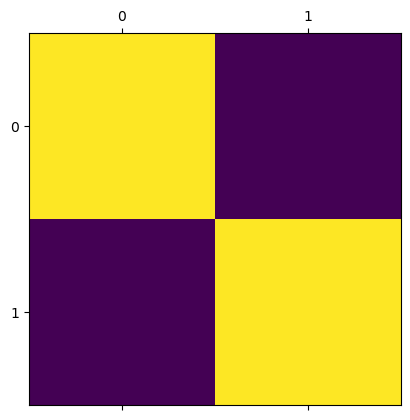

In [18]:
plt.matshow(df_sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

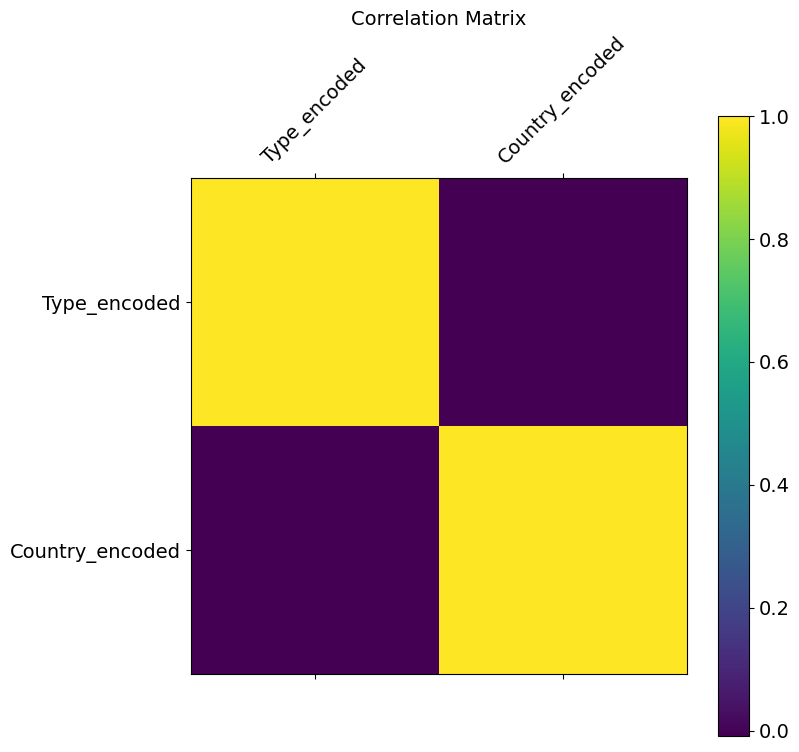

In [19]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [21]:
# Save the figure
plt.savefig('corr_matrix.png')

<Figure size 640x480 with 0 Axes>

## 4. Create a scatterplot (or plots) for the variables

In [20]:
# How has the number of titles added to Netflix changed over time?

In [21]:
# Calculate the number of titles added to Netflix for each year
titles_per_year = df['release_year'].value_counts().sort_index()

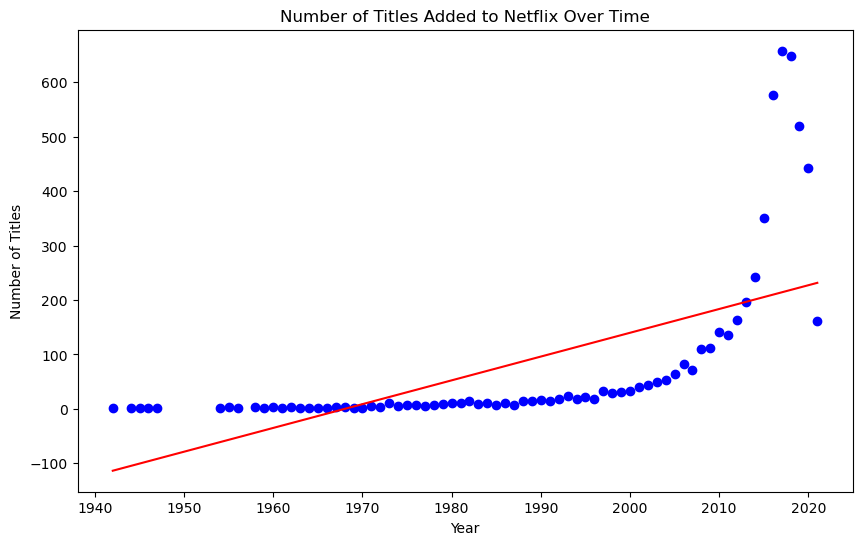

In [22]:
# Fit a linear regression line
coefficients = np.polyfit(titles_per_year.index, titles_per_year.values, 1)
trend_line = np.poly1d(coefficients)
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(titles_per_year.index, titles_per_year.values, marker='o', color='blue')
# Plot the trend line
plt.plot(titles_per_year.index, trend_line(titles_per_year.index), color='red', label='Trend Line')

plt.title('Number of Titles Added to Netflix Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(False)

plt.show()

There is no any strong relationship between release_year and titles added over the year, because the trend line has many outliers.

## 5.Create a pair plot of the entire data set.

In [22]:
# create a dataset
sub = df[['release_year', 'Type_encoded', 'Country_encoded']]

/Users/sonaliavinash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


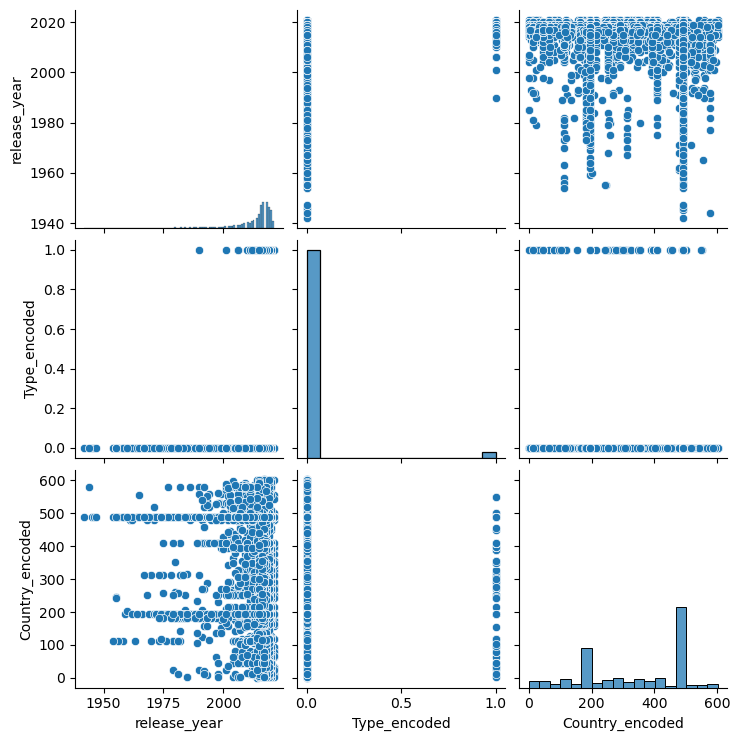

In [23]:
pair_plot = sns.pairplot(sub)

## 6. Create a categorical plot 




In [24]:
# What is the distribution of content ratings (e.g., PG-13, TV-MA) on Netflix?

<Axes: xlabel='rating', ylabel='Count'>

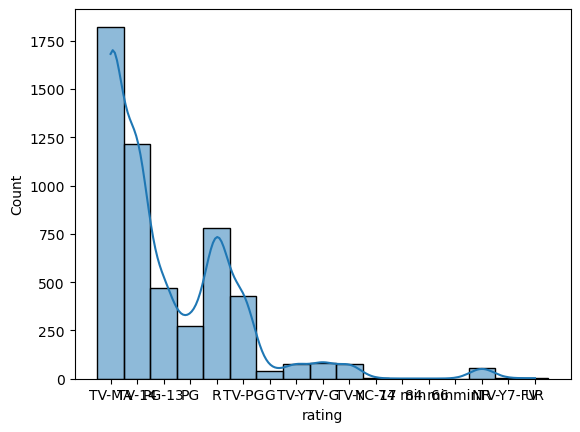

In [25]:

sns.histplot(df['rating'], bins = 40, kde = True)


In [26]:
# Define categories based on content ratings using loc
df.loc[df['rating'].isin(['G', 'TV-Y', 'TV-G']), 'content_category'] = 'Children'
df.loc[df['rating'].isin(['PG', 'TV-Y7', 'TV-Y7-FV']), 'content_category'] = 'Family'
df.loc[df['rating'].isin(['PG-13', 'TV-PG', 'TV-14']), 'content_category'] = 'Teen'
df.loc[df['rating'].isin(['R', 'NC-17', 'TV-MA']), 'content_category'] = 'Mature'

In [27]:
df['content_category'].value_counts(dropna = False)

content_category
Mature      2603
Teen        2115
Family       354
Children     200
NaN           64
Name: count, dtype: int64

In [28]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'Type_encoded',
       'Country_encoded', 'content_category'],
      dtype='object')

In [29]:
df = df.drop(columns=['category'])

KeyError: "['category'] not found in axis"

In [30]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'Type_encoded',
       'Country_encoded', 'content_category'],
      dtype='object')

/Users/sonaliavinash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


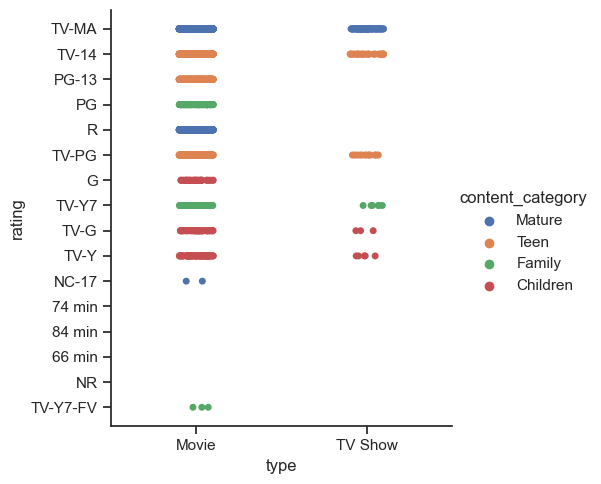

In [31]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")

df2 = sns.catplot(x="type", y="rating", hue="content_category", data=df)

In [ ]:
# fig = g.get_figure()
df2.savefig("out.png") 

I analyzed the content types (movies and TV shows) to understand the demographics they cater to. It was evident that while most movies spanned various genres suitable for all age groups, TV shows predominantly produced content tailored for mature audiences and teenagers.

## 7.

with this analysis I have answered:

1.How does the availability of titles vary across different countries?
2.How has the number of titles added to Netflix changed over time?
3.What is the distribution of content ratings (e.g., PG-13, TV-MA) on Netflix?



## 8. Define any hypotheses that you can at this point

1. The number of titles added to Netflix has increased over time.
2.The distribution of content ratings on Netflix does not follow a normal distribution.
3.There is no significant relationship between the release year and the content rating of Netflix titles.